Pandas
===

Source: [https://pandas.pydata.org/pandas-docs/stable/10min.html](https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Object creation

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.457960,-1.488513,1.135116,1.230585
2013-01-02,-0.348446,0.289185,0.060467,0.079389
2013-01-03,-1.013624,-0.567205,1.524956,1.488134
2013-01-04,-0.916940,1.496656,0.109404,1.385591
2013-01-05,0.963168,-2.618579,-0.154948,-1.634745
2013-01-06,0.101646,0.883292,-0.913372,-0.146585


In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
# df2.<TAB>

### Viewing Data

In [8]:
df.head()

,A,B,C,D
2013-01-01,-0.457960,-1.488513,1.135116,1.230585
2013-01-02,-0.348446,0.289185,0.060467,0.079389
2013-01-03,-1.013624,-0.567205,1.524956,1.488134
2013-01-04,-0.916940,1.496656,0.109404,1.385591
2013-01-05,0.963168,-2.618579,-0.154948,-1.634745


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.916940,1.496656,0.109404,1.385591
2013-01-05,0.963168,-2.618579,-0.154948,-1.634745
2013-01-06,0.101646,0.883292,-0.913372,-0.146585


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.278692,-0.334194,0.293604,0.400395
std,0.730939,1.538054,0.891139,1.215486
min,-1.013624,-2.618579,-0.913372,-1.634745
25%,-0.802195,-1.258186,-0.101094,-0.090092
50%,-0.403203,-0.139010,0.084936,0.654987
75%,-0.010877,0.734765,0.878688,1.346840
max,0.963168,1.496656,1.524956,1.488134


In [12]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.457960,-0.348446,-1.013624,-0.916940,0.963168,0.101646
B,-1.488513,0.289185,-0.567205,1.496656,-2.618579,0.883292
C,1.135116,0.060467,1.524956,0.109404,-0.154948,-0.913372
D,1.230585,0.079389,1.488134,1.385591,-1.634745,-0.146585


In [13]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,1.230585,1.135116,-1.488513,-0.457960
2013-01-02,0.079389,0.060467,0.289185,-0.348446
2013-01-03,1.488134,1.524956,-0.567205,-1.013624
2013-01-04,1.385591,0.109404,1.496656,-0.916940
2013-01-05,-1.634745,-0.154948,-2.618579,0.963168
2013-01-06,-0.146585,-0.913372,0.883292,0.101646


In [14]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,0.963168,-2.618579,-0.154948,-1.634745
2013-01-01,-0.457960,-1.488513,1.135116,1.230585
2013-01-03,-1.013624,-0.567205,1.524956,1.488134
2013-01-02,-0.348446,0.289185,0.060467,0.079389
2013-01-06,0.101646,0.883292,-0.913372,-0.146585
2013-01-04,-0.916940,1.496656,0.109404,1.385591


### Selection

In [15]:
df['A']

2013-01-01   -0.457960
2013-01-02   -0.348446
2013-01-03   -1.013624
2013-01-04   -0.916940
2013-01-05    0.963168
2013-01-06    0.101646
Freq: D, Name: A, dtype: float64

In [16]:
df[['A']]

,A
2013-01-01,-0.457960
2013-01-02,-0.348446
2013-01-03,-1.013624
2013-01-04,-0.916940
2013-01-05,0.963168
2013-01-06,0.101646


In [17]:
df[['A', 'C']]

,A,C
2013-01-01,-0.457960,1.135116
2013-01-02,-0.348446,0.060467
2013-01-03,-1.013624,1.524956
2013-01-04,-0.916940,0.109404
2013-01-05,0.963168,-0.154948
2013-01-06,0.101646,-0.913372


In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.457960,-1.488513,1.135116,1.230585
2013-01-02,-0.348446,0.289185,0.060467,0.079389
2013-01-03,-1.013624,-0.567205,1.524956,1.488134


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.348446,0.289185,0.060467,0.079389
2013-01-03,-1.013624,-0.567205,1.524956,1.488134
2013-01-04,-0.916940,1.496656,0.109404,1.385591


In [20]:
print(dates[0])
df.loc[dates[0]]

2013-01-01 00:00:00


A   -0.457960
B   -1.488513
C    1.135116
D    1.230585
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.457960,-1.488513
2013-01-02,-0.348446,0.289185
2013-01-03,-1.013624,-0.567205
2013-01-04,-0.916940,1.496656
2013-01-05,0.963168,-2.618579
2013-01-06,0.101646,0.883292


In [22]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.348446,0.289185
2013-01-03,-1.013624,-0.567205
2013-01-04,-0.916940,1.496656


In [23]:
df.loc['20130102',['A','B']]

A   -0.348446
B    0.289185
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
df.loc[dates[0],'A']

-0.45795992850249301

In [25]:
df.at[dates[0],'A']

-0.45795992850249301

### Selection by Position

In [26]:
df.iloc[3]

A   -0.916940
B    1.496656
C    0.109404
D    1.385591
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.916940,1.496656
2013-01-05,0.963168,-2.618579


In [28]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.348446,0.060467
2013-01-03,-1.013624,1.524956
2013-01-05,0.963168,-0.154948


In [29]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.348446,0.289185,0.060467,0.079389
2013-01-03,-1.013624,-0.567205,1.524956,1.488134


In [30]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.488513,1.135116
2013-01-02,0.289185,0.060467
2013-01-03,-0.567205,1.524956
2013-01-04,1.496656,0.109404
2013-01-05,-2.618579,-0.154948
2013-01-06,0.883292,-0.913372


In [31]:
df.iloc[1,1]

0.28918492400805401

In [32]:
df.iat[1,1]

0.28918492400805401

### Boolean Indexing

In [33]:
df[df.A > 0]

,A,B,C,D
2013-01-05,0.963168,-2.618579,-0.154948,-1.634745
2013-01-06,0.101646,0.883292,-0.913372,-0.146585


In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,1.135116,1.230585
2013-01-02,NaN,0.289185,0.060467,0.079389
2013-01-03,NaN,NaN,1.524956,1.488134
2013-01-04,NaN,1.496656,0.109404,1.385591
2013-01-05,0.963168,NaN,NaN,NaN
2013-01-06,0.101646,0.883292,NaN,NaN


In [35]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.457960,-1.488513,1.135116,1.230585,one
2013-01-02,-0.348446,0.289185,0.060467,0.079389,one
2013-01-03,-1.013624,-0.567205,1.524956,1.488134,two
2013-01-04,-0.916940,1.496656,0.109404,1.385591,three
2013-01-05,0.963168,-2.618579,-0.154948,-1.634745,four
2013-01-06,0.101646,0.883292,-0.913372,-0.146585,three


### Settings

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.457960,-1.488513,1.135116,1.230585,NaN
2013-01-02,-0.348446,0.289185,0.060467,0.079389,1.0
2013-01-03,-1.013624,-0.567205,1.524956,1.488134,2.0
2013-01-04,-0.916940,1.496656,0.109404,1.385591,3.0
2013-01-05,0.963168,-2.618579,-0.154948,-1.634745,4.0
2013-01-06,0.101646,0.883292,-0.913372,-0.146585,5.0


In [38]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-1.488513,1.135116,1.230585,NaN
2013-01-02,-0.348446,0.289185,0.060467,0.079389,1.0
2013-01-03,-1.013624,-0.567205,1.524956,1.488134,2.0
2013-01-04,-0.916940,1.496656,0.109404,1.385591,3.0
2013-01-05,0.963168,-2.618579,-0.154948,-1.634745,4.0
2013-01-06,0.101646,0.883292,-0.913372,-0.146585,5.0


In [39]:
# df['A']['2013-01-01'] = 1
# df

In [40]:
df.at[dates[0],'A'] = 0

In [41]:
df.iat[0,1] = 0

In [42]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.135116,5,NaN
2013-01-02,-0.348446,0.289185,0.060467,5,1.0
2013-01-03,-1.013624,-0.567205,1.524956,5,2.0
2013-01-04,-0.916940,1.496656,0.109404,5,3.0
2013-01-05,0.963168,-2.618579,-0.154948,5,4.0
2013-01-06,0.101646,0.883292,-0.913372,5,5.0


In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.135116,-5,NaN
2013-01-02,-0.348446,-0.289185,-0.060467,-5,-1.0
2013-01-03,-1.013624,-0.567205,-1.524956,-5,-2.0
2013-01-04,-0.916940,-1.496656,-0.109404,-5,-3.0
2013-01-05,-0.963168,-2.618579,-0.154948,-5,-4.0
2013-01-06,-0.101646,-0.883292,-0.913372,-5,-5.0


### Missing Data

In [44]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.135116,5,NaN
2013-01-02,-0.348446,0.289185,0.060467,5,1.0
2013-01-03,-1.013624,-0.567205,1.524956,5,2.0
2013-01-04,-0.916940,1.496656,0.109404,5,3.0
2013-01-05,0.963168,-2.618579,-0.154948,5,4.0
2013-01-06,0.101646,0.883292,-0.913372,5,5.0


In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.135116,5,NaN,1.0
2013-01-02,-0.348446,0.289185,0.060467,5,1.0,1.0
2013-01-03,-1.013624,-0.567205,1.524956,5,2.0,NaN
2013-01-04,-0.916940,1.496656,0.109404,5,3.0,NaN


In [46]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.348446,0.289185,0.060467,5,1.0,1.0


In [47]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.135116,5,NaN,1.0
2013-01-02,-0.348446,0.289185,0.060467,5,1.0,1.0
2013-01-03,-1.013624,-0.567205,1.524956,5,2.0,NaN
2013-01-04,-0.916940,1.496656,0.109404,5,3.0,NaN


In [48]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.135116,5,5.0,1.0
2013-01-02,-0.348446,0.289185,0.060467,5,1.0,1.0
2013-01-03,-1.013624,-0.567205,1.524956,5,2.0,5.0
2013-01-04,-0.916940,1.496656,0.109404,5,3.0,5.0


In [49]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Operations

In [50]:
df.mean()

A   -0.202366
B   -0.086109
C    0.293604
D    5.000000
F    3.000000
dtype: float64

In [51]:
df.mean(1)

2013-01-01    1.533779
2013-01-02    1.200241
2013-01-03    1.388825
2013-01-04    1.737824
2013-01-05    1.437928
2013-01-06    2.014313
Freq: D, dtype: float64

In [52]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.013624,-1.567205,0.524956,4.0,1.0
2013-01-04,-3.916940,-1.503344,-2.890596,2.0,0.0
2013-01-05,-4.036832,-7.618579,-5.154948,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [54]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.135116,5,NaN
2013-01-02,-0.348446,0.289185,1.195583,10,1.0
2013-01-03,-1.362070,-0.278020,2.720539,15,3.0
2013-01-04,-2.279009,1.218636,2.829943,20,6.0
2013-01-05,-1.315841,-1.399944,2.674996,25,10.0
2013-01-06,-1.214195,-0.516652,1.761624,30,15.0


In [55]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    0
2    6
3    0
4    3
5    5
6    5
7    1
8    2
9    5
dtype: int64

In [56]:
s.value_counts()

5    3
6    2
0    2
3    1
2    1
1    1
dtype: int64

In [57]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [58]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.515492,1.714191,0.446142,0.447393
1,0.402745,0.434949,-0.201864,-0.073410
2,0.961081,1.384776,-2.216411,0.768245
3,-0.894764,0.167387,-0.231187,-0.299880
4,0.595023,0.814959,-1.705707,-0.771071
5,0.849336,1.485062,-1.639178,0.819000
6,1.986885,-1.161625,-1.049415,0.494646
7,0.013303,0.004266,0.565460,0.357373
8,0.688410,0.035360,-0.929356,0.221092
9,0.684965,-0.929554,1.733930,-0.473993


In [59]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.515492,1.714191,0.446142,0.447393
1,0.402745,0.434949,-0.201864,-0.073410
2,0.961081,1.384776,-2.216411,0.768245
3,-0.894764,0.167387,-0.231187,-0.299880
4,0.595023,0.814959,-1.705707,-0.771071
5,0.849336,1.485062,-1.639178,0.819000
6,1.986885,-1.161625,-1.049415,0.494646
7,0.013303,0.004266,0.565460,0.357373
8,0.688410,0.035360,-0.929356,0.221092
9,0.684965,-0.929554,1.733930,-0.473993


In [60]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [61]:
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [65]:
left

,key,lval
0,foo,1
1,bar,2


In [66]:
right

,key,rval
0,foo,4
1,bar,5


In [67]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [68]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,1.125530,0.509675,1.322540,0.320384
1,0.671539,0.224443,0.269967,0.617171
2,0.329808,0.340239,-0.396939,-1.427629
3,-0.976071,1.691410,1.010446,0.906368
4,1.270931,0.425367,0.732474,-0.138694
5,0.178089,-1.089110,0.449467,-1.148506
6,0.743911,-0.147572,-0.365322,-0.297020
7,0.603743,-0.143347,-0.615702,0.431177


In [69]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,1.125530,0.509675,1.322540,0.320384
1,0.671539,0.224443,0.269967,0.617171
2,0.329808,0.340239,-0.396939,-1.427629
3,-0.976071,1.691410,1.010446,0.906368
4,1.270931,0.425367,0.732474,-0.138694
5,0.178089,-1.089110,0.449467,-1.148506
6,0.743911,-0.147572,-0.365322,-0.297020
7,0.603743,-0.143347,-0.615702,0.431177
8,-0.976071,1.691410,1.010446,0.906368


### Grouping

In [70]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.076920,0.699058
1,bar,one,0.615358,-1.265744
2,foo,two,1.282644,0.829921
3,bar,three,0.168573,1.219830
4,foo,two,1.685331,-0.848906
5,bar,two,-0.645003,-0.419577
6,foo,one,0.640819,0.188944
7,foo,three,-0.382821,-0.062253


In [71]:
df.groupby('A').sum()

,C,D
A,,
bar,0.138927,-0.465491
foo,3.302893,0.806763


In [72]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.615358 -1.265744
    three  0.168573  1.219830
    two   -0.645003 -0.419577
foo one    0.717739  0.888002
    three -0.382821 -0.062253
    two    2.967975 -0.018986

### Reshaping

In [73]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [74]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.611365  0.956694
      two     0.244472  0.387756
baz   one     0.325310  0.755184
      two     1.679864  0.785196

In [75]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.611365
               B    0.956694
       two     A    0.244472
               B    0.387756
baz    one     A    0.325310
               B    0.755184
       two     A    1.679864
               B    0.785196
dtype: float64

In [76]:
stacked.unstack()

A         B
first second                    
bar   one    -0.611365  0.956694
      two     0.244472  0.387756
baz   one     0.325310  0.755184
      two     1.679864  0.785196

In [77]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.611365  0.244472
      B  0.956694  0.387756
baz   A  0.325310  1.679864
      B  0.755184  0.785196

In [78]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.611365  0.325310
       B  0.956694  0.755184
two    A  0.244472  1.679864
       B  0.387756  0.785196

### Pivot Tables

In [79]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.337912,-1.652536
1,one,B,foo,0.054895,1.001628
2,two,C,foo,0.273541,-0.575617
3,three,A,bar,-0.372488,-0.845658
4,one,B,bar,1.346373,-1.104400
5,one,C,bar,-0.780932,0.821974
6,two,A,foo,0.133768,-0.488206
7,three,B,foo,0.058426,0.124022
8,one,C,foo,0.497291,0.265233
9,one,A,bar,1.184486,-0.191977


In [80]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.184486 -1.337912
      B  1.346373  0.054895
      C -0.780932  0.497291
three A -0.372488       NaN
      B       NaN  0.058426
      C -1.024938       NaN
two   A       NaN  0.133768
      B -0.146628       NaN
      C       NaN  0.273541

### Categoricals

In [81]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [82]:
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [83]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [84]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [85]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [86]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

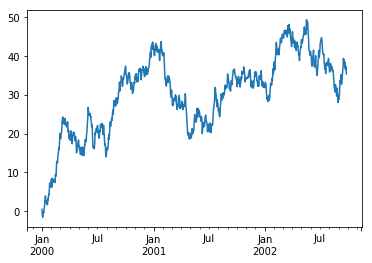

In [87]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

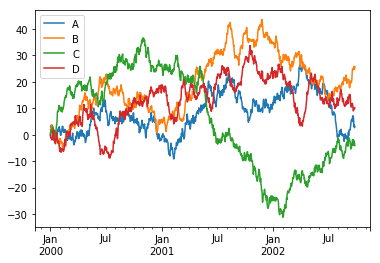

In [88]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

plt.figure(); 
df.plot(); 
plt.legend(loc='best')